In [7]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv("../data/processed/data_asv_spoof.csv")
df

,speaker_id,filename,attack_id,class_name,filepath,target,subset
0,LA_0085,LA_T_3891170,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
1,LA_0097,LA_T_2948101,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
2,LA_0084,LA_T_8919107,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
3,LA_0081,LA_T_6650735,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
4,LA_0086,LA_T_5362691,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
...,...,...,...,...,...,...,...
37448,LA_0013,LA_E_7178035,A19,spoof,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,1,testing
37449,LA_0013,LA_E_5285610,A19,spoof,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,1,testing
37450,LA_0007,LA_E_5912220,A19,spoof,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,1,testing
37451,LA_0015,LA_E_5036389,A19,spoof,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,1,testing


### Audio Waveform

In [9]:
example_path = df[df["filename"]=="LA_T_1363611"]
example_path

,speaker_id,filename,attack_id,class_name,filepath,target,subset
1688,LA_0079,LA_T_1363611,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training


In [10]:
#REAL
data_real = example_path["filepath"].iloc[0]


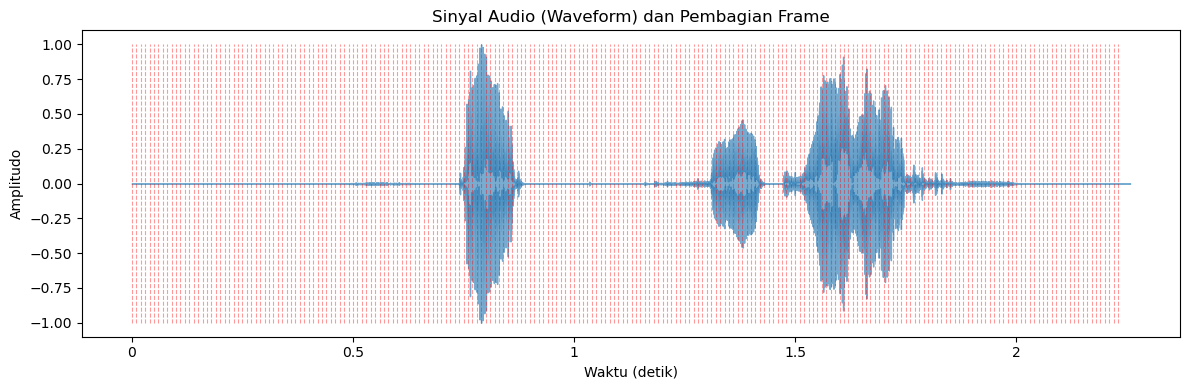

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio
audio, sr = librosa.load(data_real, sr=16000, mono=True)

# Frame parameters
frame_length = int(0.025 * sr)  # 25ms
hop_length = int(0.010 * sr)    # 10ms overlap

# Framing
frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length).T

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr, alpha=0.6, ax=ax)

# Tambahkan garis pendek (misalnya dari -0.5 ke 0.5 pada sumbu y)
for i in range(frames.shape[0]):
    start = i * hop_length / sr
    ax.plot([start, start], [-1, 1], color='red', linestyle='--', alpha=0.4, linewidth=0.8)

ax.set_title("Sinyal Audio (Waveform) dan Pembagian Frame")
ax.set_xlabel("Waktu (detik)")
ax.set_ylabel("Amplitudo")

plt.tight_layout()
plt.show()


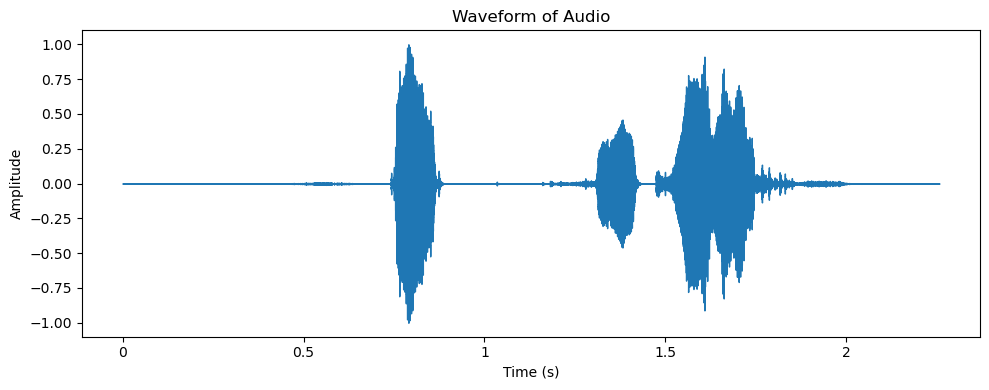

In [14]:
y, sr = librosa.load(data_real, sr=16000, mono=True)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio')
plt.tight_layout()
plt.show()

### Chroma

In [15]:
# Ekstraksi fitur Chroma numerik
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Konversi ke DataFrame
chroma_df = pd.DataFrame(chroma,
                         index=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'],
                         columns=[f'Frame-{i+1}' for i in range(chroma.shape[1])])

# Tampilkan sebagian tabel (misalnya 15 kolom pertama)
chroma_df


,Frame-1,Frame-2,Frame-3,Frame-4,Frame-5,Frame-6,Frame-7,Frame-8,Frame-9,Frame-10,...,Frame-62,Frame-63,Frame-64,Frame-65,Frame-66,Frame-67,Frame-68,Frame-69,Frame-70,Frame-71
C,0.167739,0.197068,0.181806,0.167864,0.204233,0.234097,0.516881,0.563375,0.435243,0.984570,...,0.162008,0.098678,0.125866,0.547114,1.000000,0.590913,0.371941,0.164481,0.259382,0.549616
C#,0.222410,0.108126,0.074754,0.072498,0.190636,0.319841,0.273356,0.208203,0.295671,1.000000,...,0.157195,0.095242,0.104887,0.338449,0.846015,0.470251,0.337793,0.105374,0.248950,0.437849
D,0.516778,0.264292,0.232906,0.206654,0.328853,0.432752,0.301808,0.097186,0.136043,0.576204,...,0.087738,0.066901,0.080945,0.253251,0.411676,0.293445,0.328746,0.196655,0.247783,0.307012
D#,0.848413,0.594936,0.472784,0.482485,0.760535,0.518009,0.251173,0.077487,0.113246,0.497710,...,0.102135,0.101581,0.158801,0.286323,0.517366,0.490967,0.517018,0.527847,0.538367,0.529184
E,0.899445,0.827178,0.744687,0.736783,1.000000,0.756190,0.303493,0.096517,0.173701,0.780587,...,0.123819,0.074574,0.078689,0.304502,0.732902,0.761390,0.815318,0.797007,0.812459,0.827951
F,1.000000,1.000000,1.000000,1.000000,0.977424,1.000000,0.504181,0.193669,0.343048,0.975800,...,0.170546,0.082090,0.083086,0.383341,0.901792,1.000000,1.000000,1.000000,1.000000,1.000000
F#,0.778697,0.554701,0.547025,0.523760,0.550308,0.689032,0.434946,0.154327,0.338804,0.392292,...,0.292358,0.171110,0.238687,1.000000,0.973302,0.682928,0.401181,0.708988,0.377797,0.881995
G,0.605780,0.288248,0.294170,0.285868,0.503253,0.502131,0.351946,0.181466,0.327327,0.418526,...,0.558749,0.323717,0.334896,0.924848,0.830401,0.487223,0.246644,0.452857,0.472889,0.770875
G#,0.500115,0.221181,0.216736,0.208384,0.556931,0.373074,0.272225,0.374449,0.529676,0.890952,...,0.974039,1.000000,1.000000,0.887329,0.769389,0.410431,0.420236,0.336603,0.888243,0.619257
A,0.635533,0.268795,0.122426,0.142345,0.458535,0.348319,0.210404,0.479774,0.796712,0.934051,...,1.000000,0.528164,0.445345,0.633966,0.500053,0.224024,0.307599,0.249835,0.859484,0.499562


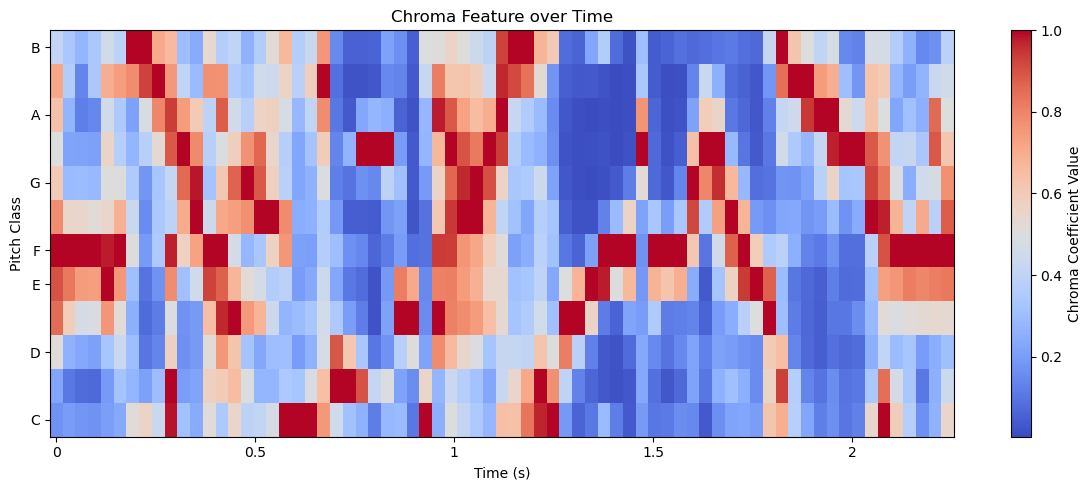

In [16]:
# Import necessary libraries
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y' (audio signal) and 'sr' (sample rate) are already loaded in the environment

# Hitung fitur Chroma
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Konversi ke DataFrame
chroma_df = pd.DataFrame(chroma,
                         index=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'],
                         columns=[f'Frame-{i+1}' for i in range(chroma.shape[1])])

# Visualisasi Chroma
plt.figure(figsize=(12, 5))

# Plot Chroma dengan librosa.display.specshow
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')

# Label dan gaya
plt.colorbar(label='Chroma Coefficient Value')
plt.title('Chroma Feature over Time')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
chroma_df.to_csv("../data/output/fitur_chroma.csv")

### MFCC

In [18]:
# Ekstraksi fitur MFCC (20 koefisien pertama)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# Konversi MFCC ke DataFrame untuk visualisasi
mfcc_df = pd.DataFrame(mfcc,
                       index=[f'MFCC-{i+1}' for i in range(mfcc.shape[0])],
                       columns=[f'Frame-{j+1}' for j in range(mfcc.shape[1])])

mfcc_df

,Frame-1,Frame-2,Frame-3,Frame-4,Frame-5,Frame-6,Frame-7,Frame-8,Frame-9,Frame-10,...,Frame-62,Frame-63,Frame-64,Frame-65,Frame-66,Frame-67,Frame-68,Frame-69,Frame-70,Frame-71
MFCC-1,-558.921265,-556.329529,-555.725403,-556.566040,-557.965576,-558.659119,-558.461548,-557.541626,-558.722839,-559.763184,...,-353.165100,-352.598175,-428.307404,-504.335968,-526.673950,-545.378296,-553.459534,-555.970093,-557.165527,-556.038147
MFCC-2,12.301071,15.823961,16.679243,15.520950,13.551769,12.568691,12.853871,14.132124,12.492743,11.026279,...,-16.249050,5.790955,37.834557,51.774666,36.396507,24.975029,17.850552,15.943944,14.446934,16.272179
MFCC-3,11.934711,15.064676,15.911697,14.831116,12.917937,11.939489,12.219679,13.426299,11.884604,10.428562,...,17.393665,7.243293,-3.085242,-8.473820,-0.422779,11.303091,12.959372,14.256754,13.234834,15.615973
MFCC-4,11.344543,13.921074,14.722565,13.731559,11.982067,11.042183,11.253900,12.332113,10.963913,9.515753,...,-26.040737,-24.272957,-27.883320,-18.680822,-9.563111,2.733507,9.526319,12.199135,11.692347,14.626303
MFCC-5,10.559571,12.533581,13.221548,12.292674,10.873403,10.031839,10.059783,10.948662,9.833980,8.387140,...,24.896219,28.059361,21.462971,6.285166,8.190048,5.360353,9.736247,10.416201,10.257349,13.418281
MFCC-6,9.617218,11.032613,11.522011,10.603782,9.695418,9.018421,8.731010,9.377007,8.584949,7.141248,...,-21.736954,-14.656672,-6.614402,13.563811,20.400404,13.834493,11.965822,9.167488,9.157104,12.091078
MFCC-7,8.560565,9.507059,9.720514,8.765147,8.495211,8.026661,7.330618,7.702142,7.271458,5.855806,...,-17.957245,-28.718899,-27.462141,3.787270,14.985132,17.808182,12.651417,8.226822,8.315838,10.702374
MFCC-8,7.435141,7.994949,7.888502,6.879203,7.264113,7.001509,5.889318,5.987029,5.911285,4.580410,...,1.314250,0.003008,7.435705,6.311801,7.393651,12.710962,9.931298,7.105882,7.446826,9.266695
MFCC-9,6.285719,6.497297,6.076499,5.041992,5.967388,5.855311,4.422004,4.278653,4.503961,3.342125,...,8.502117,7.690774,11.849787,14.556578,5.865537,3.498901,5.347122,5.441760,6.266038,7.776478
MFCC-10,5.153276,5.005560,4.325641,3.335649,4.586267,4.532059,2.951916,2.620106,3.057955,2.158558,...,-9.990415,-6.916114,0.372292,5.914736,2.241391,-1.639963,2.042431,3.284616,4.693298,6.233175


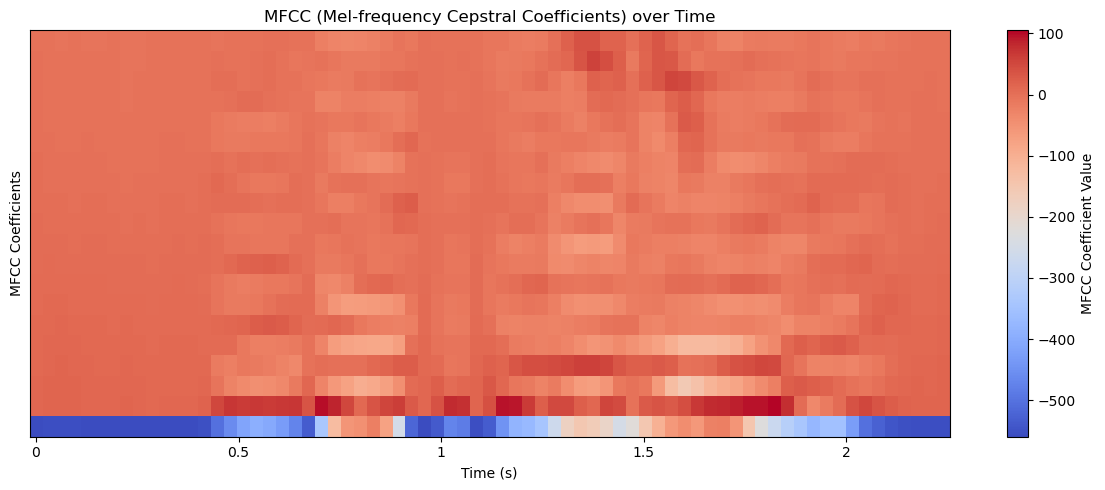

In [19]:
# Hitung MFCC (20 koefisien pertama)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# Konversi MFCC ke DataFrame untuk visualisasi
mfcc_df = pd.DataFrame(mfcc,
                       index=[f'MFCC-{i+1}' for i in range(mfcc.shape[0])],
                       columns=[f'Frame-{j+1}' for j in range(mfcc.shape[1])])

# Visualisasi MFCC
plt.figure(figsize=(12, 5))

# Plot MFCC dengan librosa.display.specshow
librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')

# Label dan gaya
plt.colorbar(label='MFCC Coefficient Value')
plt.title('MFCC (Mel-frequency Cepstral Coefficients) over Time')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
mfcc_df.to_csv("../data/output/fitur_mfcc_df.csv")

In [21]:
# Ekstraksi fitur spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)

# Konversi ke DataFrame (opsional, untuk ditampilkan dalam tabel)
centroid_df = pd.DataFrame(spectral_centroids.T, columns=['Spectral Centroid'])

centroid_df

,Spectral Centroid
0,1660.805653
1,1708.803938
2,1712.035895
3,1829.339333
4,1865.464324
...,...
66,1725.487648
67,2040.329719
68,1856.916910
69,1834.139400


### Spectral Centroid

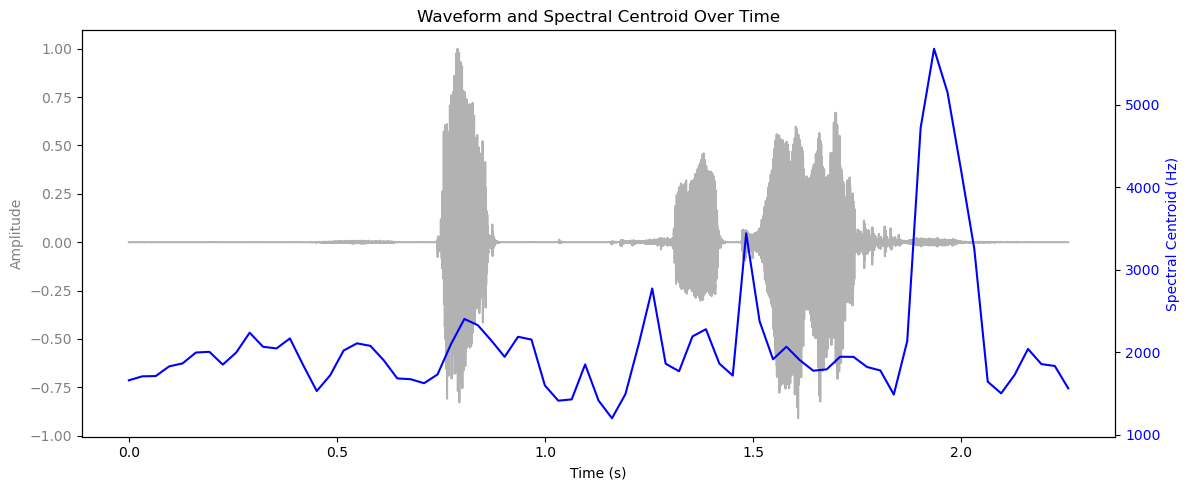

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung waktu untuk waveform
t_wave = np.linspace(0, len(y) / sr, num=len(y))

# Hitung waktu untuk spectral centroid (misalnya, jika 't' belum didefinisikan)
t_centroid = np.linspace(0, len(y) / sr, num=len(spectral_centroids[0]))

# Plot waveform dan spectral centroid dalam satu figure
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot waveform
ax1.plot(t_wave, y, color='gray', alpha=0.6, label='Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Twin axis untuk spectral centroid
ax2 = ax1.twinx()
ax2.plot(t_centroid, spectral_centroids[0], color='blue', label='Spectral Centroid')
ax2.set_ylabel('Spectral Centroid (Hz)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title dan layout
plt.title('Waveform and Spectral Centroid Over Time')
fig.tight_layout()
plt.show()


In [ ]:
centroid_df.to_csv("../data/output/fitur_spectral_centroid.csv", index=False)

### Spectral Spread

In [24]:
# Ekstraksi spectral spread (bandwidth)
spectral_spread = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Konversi ke DataFrame (opsional)
spread_df = pd.DataFrame(spectral_spread.T, columns=['Spectral Spread'])

spread_df

,Spectral Spread
0,2301.779199
1,2323.770244
2,2303.576097
3,2332.101385
4,2323.430944
...,...
66,2084.424457
67,2297.937855
68,2277.752874
69,2291.155844


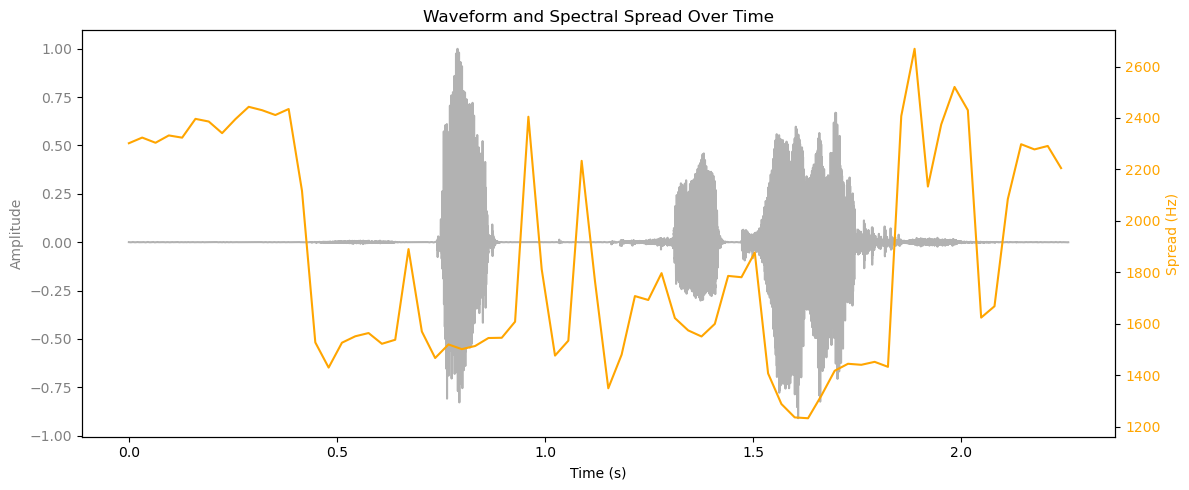

In [25]:
import matplotlib.pyplot as plt
import librosa.display

# Hitung waktu per frame untuk spectral spread
frames = range(len(spectral_spread[0]))
t_spread = librosa.frames_to_time(frames, sr=sr)

# Hitung waktu untuk waveform
t_wave = np.linspace(0, len(y) / sr, num=len(y))

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot waveform
ax1.plot(t_wave, y, color='gray', alpha=0.6, label='Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Twin axis for spectral spread
ax2 = ax1.twinx()
ax2.plot(t_spread, spectral_spread[0], color='orange', label='Spectral Spread')
ax2.set_ylabel('Spread (Hz)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title & layout
plt.title('Waveform and Spectral Spread Over Time')
fig.tight_layout()
plt.show()


In [ ]:
spread_df.to_csv("../data/output/fitur_spectral_spread.csv", index=False)

### SC & SS

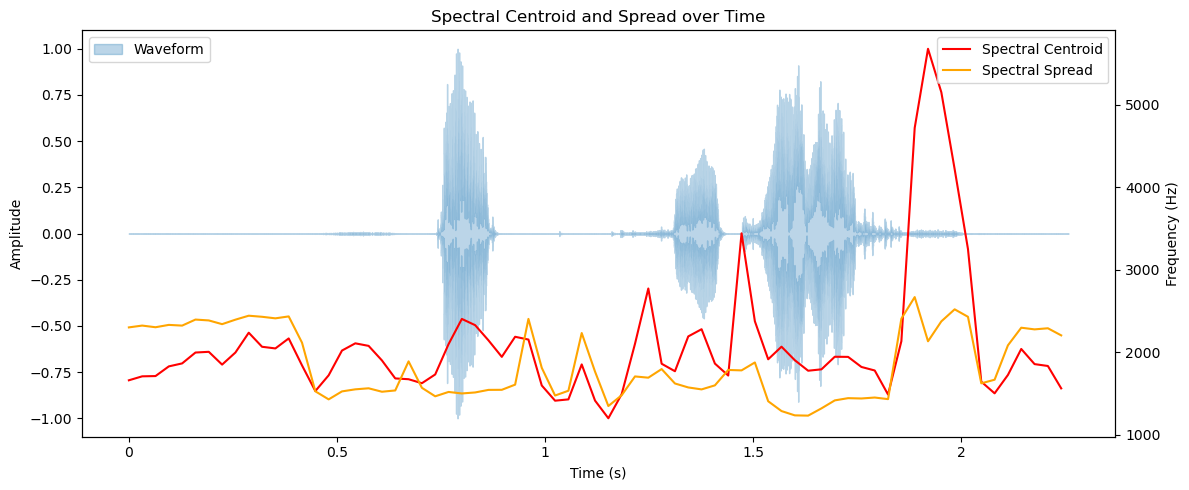

In [27]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Misalnya, pastikan anda sudah memiliki sinyal 'y' dan sample rate 'sr' yang di-load sebelumnya
# Misalnya, menghitung spectral centroid dan spread
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_spread = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Hitung waktu per frame
t = librosa.frames_to_time(range(len(centroid[0])), sr=sr)

# Plot gabungan centroid dan spread
plt.figure(figsize=(12, 5))

# Plot waveform sebagai latar belakang
ax1 = plt.gca()  # Ambil axis pertama untuk waveform
librosa.display.waveshow(y, sr=sr, alpha=0.3, label='Waveform', ax=ax1)

# Twin axis untuk plot spectral centroid dan spread
ax2 = ax1.twinx()  # Membuat sumbu y kedua untuk spectral centroid dan spread

# Plot spectral centroid
ax2.plot(t, centroid[0], color='r', label='Spectral Centroid')

# Plot spectral spread
ax2.plot(t, spectral_spread[0], color='orange', label='Spectral Spread')

# Label dan gaya
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Frequency (Hz)')

# Menambahkan title dan legend
plt.title('Spectral Centroid and Spread over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Layout yang rapi
plt.tight_layout()
plt.show()


### Spectral Rolloff

In [28]:
# Hitung spectral rolloff (default roll_percent=0.85 atau 85%)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.80)

# Ubah ke DataFrame (opsional)
rolloff_df = pd.DataFrame(rolloff.T, columns=['Spectral Rolloff'])

rolloff_df

,Spectral Rolloff
0,3671.8750
1,3851.5625
2,3867.1875
3,4085.9375
4,4101.5625
...,...
66,3335.9375
67,4375.0000
68,4093.7500
69,4007.8125


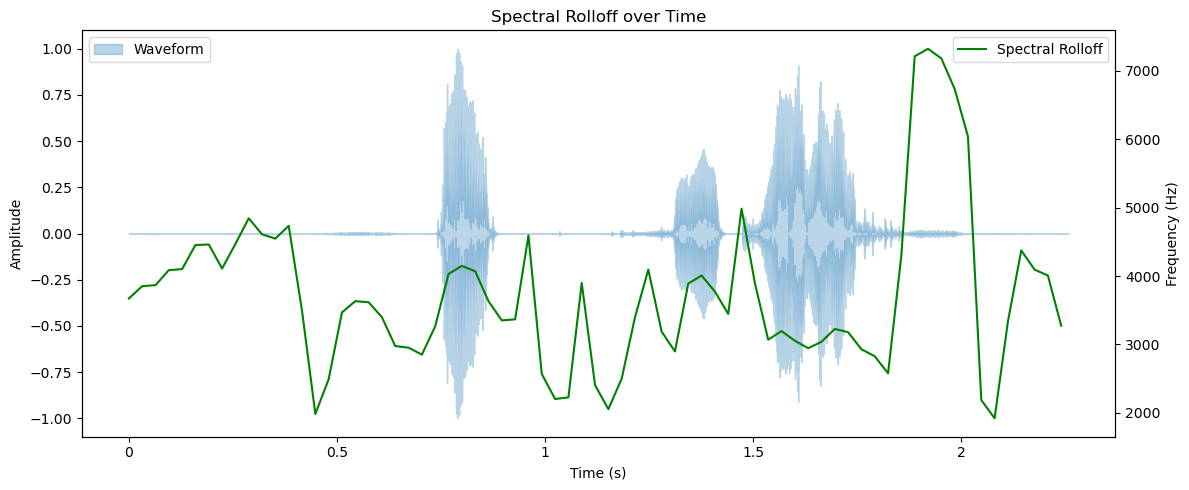

In [29]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd

# Misalnya, pastikan anda sudah memiliki sinyal 'y' dan sample rate 'sr' yang di-load sebelumnya
# Misalnya, menghitung spectral rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.80)

# Ubah ke DataFrame (opsional)
rolloff_df = pd.DataFrame(rolloff.T, columns=['Spectral Rolloff'])

# Hitung waktu per frame
t = librosa.frames_to_time(range(len(rolloff[0])), sr=sr)

# Visualisasi Spectral Rolloff
plt.figure(figsize=(12, 5))

# Plot waveform sebagai latar belakang
ax1 = plt.gca()  # Ambil axis pertama untuk waveform
librosa.display.waveshow(y, sr=sr, alpha=0.3, label='Waveform', ax=ax1)

# Twin axis untuk plot spectral centroid dan spread
ax2 = ax1.twinx()  # Membuat sumbu y kedua untuk spectral centroid dan spread

# Plot spectral rolloff
ax2.plot(t, rolloff[0], color='green', label='Spectral Rolloff')

# Label dan gaya
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Frequency (Hz)')

# Menambahkan title dan legend
plt.title('Spectral Rolloff over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Layout yang rapi
plt.tight_layout()
plt.show()



In [ ]:
rolloff_df.to_csv("../data/output/fitur_spectral_rolloff.csv",index=False)

### ZCR

In [31]:
# Ekstraksi Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)

# Konversi ke DataFrame (opsional)
zcr_df = pd.DataFrame(zcr.T, columns=["Zero Crossing Rate"])

# Cetak nilai ZCR frame-frame awal
zcr_df

,Zero Crossing Rate
0,0.023926
1,0.034180
2,0.046875
3,0.041504
4,0.053711
...,...
66,0.081055
67,0.059082
68,0.057129
69,0.041504


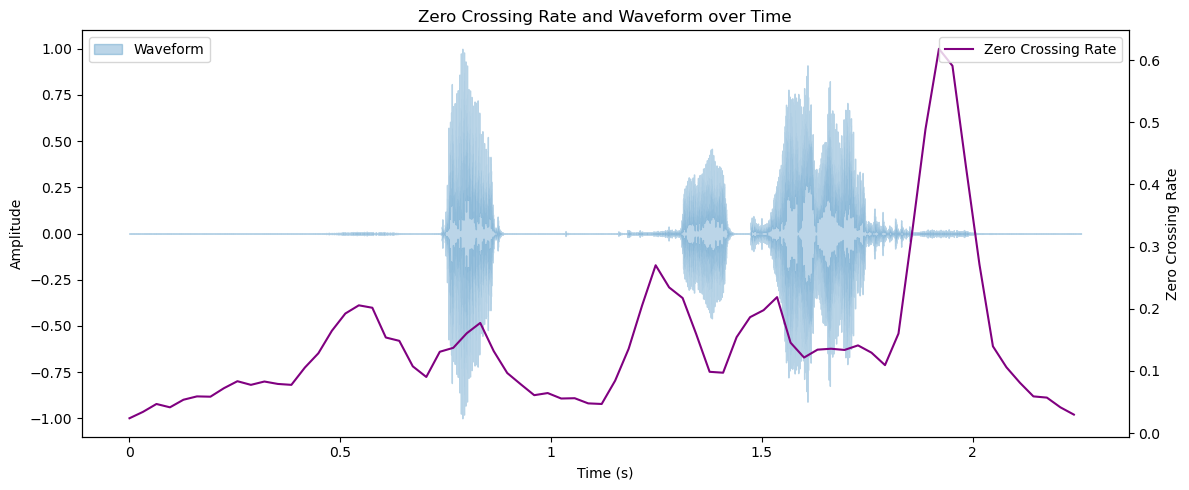

In [32]:
# Hitung Zero Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(y)

# Ubah ke DataFrame (opsional)
zcr_df = pd.DataFrame(zcr.T, columns=["Zero Crossing Rate"])

# Hitung waktu per frame
t = librosa.frames_to_time(range(len(zcr[0])), sr=sr)

# Visualisasi Zero Crossing Rate
plt.figure(figsize=(12, 5))

# Plot waveform sebagai latar belakang
ax1 = plt.gca()  # Ambil axis pertama untuk waveform
librosa.display.waveshow(y, sr=sr, alpha=0.3, label='Waveform', ax=ax1)

# Twin axis untuk plot zero crossing rate
ax2 = ax1.twinx()  # Membuat sumbu y kedua untuk zero crossing rate

# Plot zero crossing rate
ax2.plot(t, zcr[0], color='purple', label='Zero Crossing Rate')

# Label dan gaya
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Zero Crossing Rate')

# Menambahkan title dan legend
plt.title('Zero Crossing Rate and Waveform over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Layout yang rapi
plt.tight_layout()
plt.show()



In [ ]:
zcr_df.to_csv("../data/output/fitur_ZCR.csv",index=False)

### RMS

In [34]:

# Ekstraksi RMS energy
rms = librosa.feature.rms(y=y)

# Konversi ke DataFrame (opsional)
rms_df = pd.DataFrame(rms.T, columns=["RMS Energy"])

# Cetak nilai awal
print(rms_df.head(10))

   RMS Energy
0    0.000320
1    0.000372
2    0.000411
3    0.000388
4    0.000318
5    0.000285
6    0.000293
7    0.000272
8    0.000261
9    0.000285


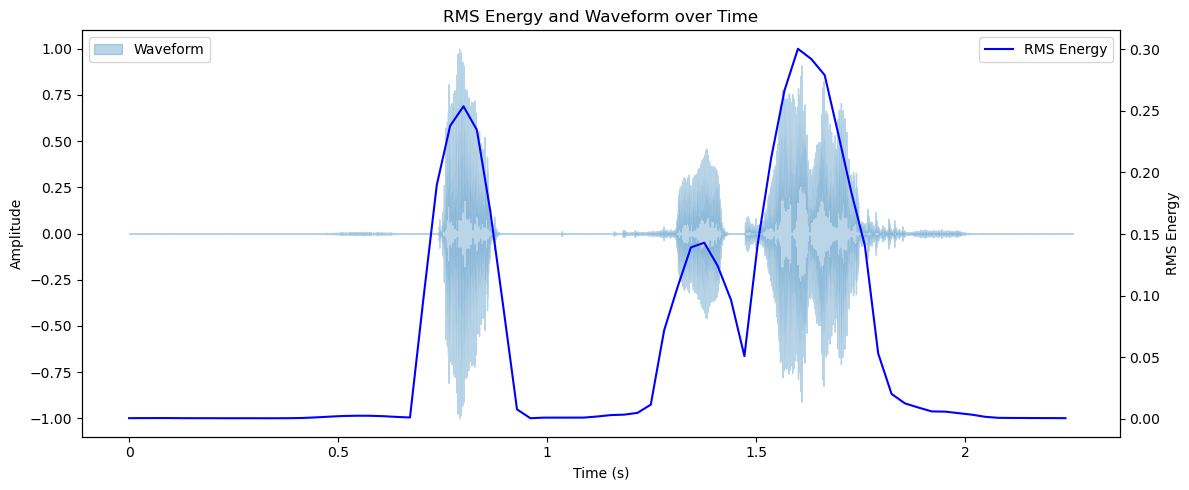

In [35]:
# Hitung RMS energy
rms = librosa.feature.rms(y=y)

# Ubah ke DataFrame (opsional)
rms_df = pd.DataFrame(rms.T, columns=["RMS Energy"])

# Hitung waktu per frame
t = librosa.frames_to_time(range(len(rms[0])), sr=sr)

# Visualisasi RMS Energy
plt.figure(figsize=(12, 5))

# Plot waveform sebagai latar belakang
ax1 = plt.gca()  # Ambil axis pertama untuk waveform
librosa.display.waveshow(y, sr=sr, alpha=0.3, label='Waveform', ax=ax1)

# Twin axis untuk plot RMS energy
ax2 = ax1.twinx()  # Membuat sumbu y kedua untuk RMS energy

# Plot RMS energy
ax2.plot(t, rms[0], color='blue', label='RMS Energy')

# Label dan gaya
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('RMS Energy')

# Menambahkan title dan legend
plt.title('RMS Energy and Waveform over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Layout yang rapi
plt.tight_layout()
plt.show()


In [ ]:
rms_df.to_csv("../data/output/fitur_rms.csv", index=False)

### Gabungan

In [37]:
# Ekstraksi fitur
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spread = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
rms = librosa.feature.rms(y=y)

# Hitung nilai rata-rata (agregat per fitur)
features = {
    **{f'Chroma-{i+1}': np.mean(chroma[i]) for i in range(12)},
    **{f'MFCC-{i+1}': np.mean(mfcc[i]) for i in range(20)},
    'Spectral Centroid': np.mean(centroid),
    'Spectral Spread': np.mean(spread),
    'Spectral Rolloff': np.mean(rolloff),
    'ZCR': np.mean(zcr),
    'RMS': np.mean(rms)
}

# Konversi ke DataFrame untuk tabel akhir
df_features = pd.DataFrame(features.items(), columns=['Fitur', 'Nilai'])
print(df_features)

                Fitur        Nilai
0            Chroma-1     0.388766
1            Chroma-2     0.356461
2            Chroma-3     0.320739
3            Chroma-4     0.428114
4            Chroma-5     0.510108
5            Chroma-6     0.553457
6            Chroma-7     0.456791
7            Chroma-8     0.423815
8            Chroma-9     0.487096
9           Chroma-10     0.409206
10          Chroma-11     0.416606
11          Chroma-12     0.372754
12             MFCC-1  -367.591064
13             MFCC-2    40.755470
14             MFCC-3   -19.880440
15             MFCC-4    11.534455
16             MFCC-5   -21.671137
17             MFCC-6    -4.992123
18             MFCC-7   -14.239730
19             MFCC-8     0.412031
20             MFCC-9    -4.829843
21            MFCC-10   -10.816035
22            MFCC-11    -2.685060
23            MFCC-12    -4.831542
24            MFCC-13    -3.772096
25            MFCC-14    -9.942656
26            MFCC-15    -7.430133
27            MFCC-1

In [ ]:
df_features.to_csv("../data/output/fitur_df_features.csv", index = False)

### Statdes

In [39]:
import time
import librosa
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm

def extract_features_optimized(df, n_jobs=-1):
    start_time = time.perf_counter()

    def _process_file(filepath, target):
        try:
            y, sr = librosa.load(filepath, sr=16000, mono=True)
            S = np.abs(librosa.stft(y))

            chroma = librosa.feature.chroma_stft(S=S, sr=sr).mean(axis=1)
            rms = librosa.feature.rms(S=S).mean()
            spectral_centroid = librosa.feature.spectral_centroid(S=S, sr=sr).mean()
            spectral_bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr).mean()
            spectral_rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr).mean()
            zcr = librosa.feature.zero_crossing_rate(y).mean()
            mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sr, n_mfcc=20).mean(axis=1)

            return [*chroma, rms, spectral_centroid, spectral_bandwidth,
                    spectral_rolloff, zcr, *mfccs, int(target)]
        except Exception as e:
            print(f"Error processing {filepath}: {e}")
            return None

    features = Parallel(n_jobs=n_jobs)( 
        delayed(_process_file)(row["filepath"], row["target"])
        for _, row in tqdm(df.iterrows(), total=len(df))
    )

    features = [f for f in features if f is not None]  # filter failed

    columns = (
        [f'chroma_{i+1}' for i in range(12)] +
        ['rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean',
         'spectral_rolloff_mean', 'zcr_mean'] +
        [f'mfcc_{i+1}' for i in range(20)] + ['label']
    )

    features_df = pd.DataFrame(features, columns=columns)

    # No scaling applied in this version
    elapsed_time = time.perf_counter() - start_time

    return features_df, elapsed_time


In [40]:
df_train = df[df["subset"]=="training"]
df_val = df[df["subset"]=="validation"]

In [ ]:
train_features, train_time = extract_features_optimized(df_train)
val_features, val_time = extract_features_optimized(df_val)

  0%|          | 8/7740 [00:19<10:25, 12.36it/s]

In [ ]:
train_features.to_csv("../data/output/numeric_train_data_notstd.csv", index=False)
val_features.to_csv("../data/output/numeric_val_data_notstd.csv", index=False)

In [ ]:
train_features = pd.read_csv("../data/output/numeric_train_data_notstd.csv")
val_features = pd.read_csv("../data/output/numeric_train_data_notstd.csv")

In [44]:
data_final = pd.concat([train_features, val_features], axis = 0).reset_index(drop=True)
data_final

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label
0,0.608922,0.560164,0.547548,0.562325,0.571360,0.674604,0.694295,0.630097,0.660122,0.659999,...,2.828772,-9.295396,-8.836390,-15.655452,-9.957190,-8.188174,-9.096660,-9.445615,-13.258592,0
1,0.563116,0.522872,0.513625,0.529441,0.561316,0.670231,0.708544,0.746973,0.789873,0.756066,...,-3.380350,-10.202300,-10.745051,-17.629269,-14.792455,-6.136567,-3.310243,-8.475481,-8.314748,0
2,0.702777,0.665832,0.683765,0.661198,0.645375,0.677272,0.662752,0.701049,0.761823,0.764314,...,1.440105,-9.979267,-8.913960,-4.392785,-5.218858,-6.052348,-5.097084,-4.914911,-4.120407,0
3,0.615852,0.522638,0.525350,0.618919,0.638763,0.615077,0.583223,0.607924,0.658168,0.689644,...,-7.714786,-7.162498,-11.903506,-11.915051,-13.005176,-9.531820,-9.265876,-11.988121,-14.937865,0
4,0.478915,0.528083,0.549663,0.460375,0.489854,0.683917,0.809043,0.741167,0.589817,0.529311,...,-1.564001,-12.076619,-8.927552,-11.658197,-11.671876,-2.956169,-14.630268,-11.869398,-12.073774,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,0.572768,0.588303,0.552857,0.545605,0.565285,0.645839,0.725004,0.698522,0.631272,0.625563,...,8.998988,-28.831118,-3.364189,-26.509676,1.255030,-21.342255,-1.499155,-22.375391,-7.571852,1
15476,0.561132,0.538528,0.499608,0.563119,0.553531,0.626192,0.777930,0.751854,0.694160,0.644915,...,5.717680,-13.634125,-1.647685,-23.134726,-3.997508,-14.794583,0.082228,-22.260763,-5.089146,1
15477,0.667798,0.670532,0.702412,0.767788,0.800821,0.804906,0.823995,0.857934,0.893489,0.860420,...,7.961836,-13.904462,7.152821,-15.617015,2.615904,-16.634455,-3.731125,-13.004099,-1.307871,1
15478,0.647011,0.588317,0.608140,0.678355,0.683864,0.650729,0.665241,0.765184,0.782259,0.827574,...,10.131081,-21.192009,9.990476,-15.936957,2.982360,-20.719725,-3.378987,-18.813951,-4.979123,1


In [45]:
# Menghitung mean, median, dan std berdasarkan label
mean_values = data_final.groupby(by="label").mean()
median_values = data_final.groupby(by="label").median()
std_values = data_final.groupby(by="label").std()

mean_values


,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,0.623392,0.608824,0.609124,0.614440,0.620067,0.647581,0.667418,0.691771,0.700834,0.696501,...,-3.049406,-4.305247,-8.995079,-7.882079,-10.371396,-10.009518,-10.189372,-10.277458,-10.929575,-11.199992
1,0.570850,0.559011,0.562146,0.576979,0.589840,0.613809,0.632367,0.650782,0.659833,0.659351,...,-11.143246,1.011960,-15.709681,-5.630164,-18.741105,-7.941478,-17.030568,-8.041765,-18.109968,-9.855083


In [46]:
std_values

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,0.062340,0.065056,0.068999,0.069232,0.068631,0.071990,0.073861,0.066208,0.058606,0.060729,...,6.459254,6.232498,5.178353,5.983460,5.470325,4.738335,4.41154,3.545500,3.405172,3.261087
1,0.087839,0.094379,0.104579,0.106242,0.101615,0.100507,0.094953,0.091564,0.087229,0.087098,...,11.293477,9.273140,10.288121,9.525353,10.340680,8.630522,6.64099,6.143953,5.555014,5.488567


In [47]:
median_values

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,0.626610,0.606647,0.604223,0.612374,0.617880,0.647312,0.665415,0.691035,0.699206,0.697449,...,-3.461089,-4.320952,-8.701455,-8.235160,-10.105702,-9.946389,-9.959145,-10.103827,-10.969267,-11.271992
1,0.583201,0.566728,0.567057,0.582359,0.593985,0.621107,0.640989,0.656249,0.663464,0.664471,...,-10.098787,1.372184,-15.036625,-5.256908,-18.568198,-7.695550,-16.352311,-7.515849,-17.556418,-10.226086


In [48]:
summary_stats = pd.concat(
    [mean_values, median_values, std_values],
    keys=['Mean', 'Median', 'Std'],
    axis=0
)

In [51]:
summary_stats

chroma_1  chroma_2  chroma_3  chroma_4  chroma_5  chroma_6  \
       label                                                               
Mean   0      0.623392  0.608824  0.609124  0.614440  0.620067  0.647581   
       1      0.570850  0.559011  0.562146  0.576979  0.589840  0.613809   
Median 0      0.626610  0.606647  0.604223  0.612374  0.617880  0.647312   
       1      0.583201  0.566728  0.567057  0.582359  0.593985  0.621107   
Std    0      0.062340  0.065056  0.068999  0.069232  0.068631  0.071990   
       1      0.087839  0.094379  0.104579  0.106242  0.101615  0.100507   

              chroma_7  chroma_8  chroma_9  chroma_10  ...    mfcc_11  \
       label                                           ...              
Mean   0      0.667418  0.691771  0.700834   0.696501  ...  -3.049406   
       1      0.632367  0.650782  0.659833   0.659351  ... -11.143246   
Median 0      0.665415  0.691035  0.699206   0.697449  ...  -3.461089   
       1      0.640989  0.656249  0.663464   0.664471  ... -10.098787   
Std    0      0.073861  0.066208  0.058606   0.060729  ...   6.459254   
       1      0.094953  0.091564  0.087229   0.087098  ...  11.293477   

               mfcc_12    mfcc_13   mfcc_14    mfcc_15    mfcc_16    mfcc_17  \
       label                                                                   
Mean   0     -4.305247  -8.995079 -7.882079 -10.371396 -10.009518 -10.189372   
       1      1.011960 -15.709681 -5.630164 -18.741105  -7.941478 -17.030568   
Median 0     -4.320952  -8.701455 -8.235160 -10.105702  -9.946389  -9.959145   
       1      1.372184 -15.036625 -5.256908 -18.568198  -7.695550 -16.352311   
Std    0      6.232498   5.178353  5.983460   5.470325   4.738335   4.411540   
       1      9.273140  10.288121  9.525353  10.340680   8.630522   6.640990   

                mfcc_18    mfcc_19    mfcc_20  
       label                                   
Mean   0     -10.277458 -10.929575 -11.199992  
       1      -8.041765 -18.109968  -9.855083  
Median 0     -10.103827 -10.969267 -11.271992  
       1      -7.515849 -17.556418 -10.226086  
Std    0       3.545500   3.405172   3.261087  
       1       6.143953   5.555014   5.488567  

[6 rows x 37 columns]

In [53]:
import pandas as pd
from scipy.stats import f
import numpy as np

# Dataframe untuk menyimpan hasil uji F
f_results = []

# Iterasi untuk setiap kolom kecuali "label"
for feature in data_final.columns:
    if feature != "label":
        # Pisahkan data berdasarkan label
        group_bona = data_final[data_final["label"] == 0][feature]
        group_fake = data_final[data_final["label"] == 1][feature]
        
        # Menghitung varians untuk kedua grup
        var_bona = np.var(group_bona, ddof=1)
        var_fake = np.var(group_fake, ddof=1)
        
        # Menghitung nilai F (rasio varians)
        if var_bona > var_fake:
            F_stat = var_bona / var_fake
            dfn = len(group_bona) - 1  # derajat kebebasan untuk grup pertama
            dfd = len(group_fake) - 1  # derajat kebebasan untuk grup kedua
        else:
            F_stat = var_fake / var_bona
            dfn = len(group_fake) - 1
            dfd = len(group_bona) - 1
        
        # Menghitung p-value berdasarkan distribusi F
        p_value = 1 - f.cdf(F_stat, dfn, dfd)
        
        # Simpan hasil ke dalam list
        f_results.append({
            "Feature": feature,
            "Group_bona Variance": var_bona,
            "Group_fake Variance": var_fake,
            "F-Statistic": F_stat,
            "P-Value": p_value,
            "Significant": p_value < 0.05
        })

# Konversi hasil ke DataFrame untuk ditampilkan
f_results_df = pd.DataFrame(f_results)

# Tampilkan tabel hasil
f_results_df


,Feature,Group_bona Variance,Group_fake Variance,F-Statistic,P-Value,Significant
0,chroma_1,0.003886,0.007716,1.985358,1.110223e-16,True
1,chroma_2,0.004232,0.008907,2.104633,1.110223e-16,True
2,chroma_3,0.004761,0.010937,2.297250,1.110223e-16,True
3,chroma_4,0.004793,0.011287,2.354935,1.110223e-16,True
4,chroma_5,0.004710,0.010326,2.192213,1.110223e-16,True
5,chroma_6,0.005183,0.010102,1.949169,1.110223e-16,True
6,chroma_7,0.005455,0.009016,1.652676,1.110223e-16,True
7,chroma_8,0.004383,0.008384,1.912623,1.110223e-16,True
8,chroma_9,0.003435,0.007609,2.215308,1.110223e-16,True
9,chroma_10,0.003688,0.007586,2.056972,1.110223e-16,True


In [54]:
import pandas as pd
from scipy.stats import norm
import numpy as np

# Dataframe untuk menyimpan hasil uji Z-score
z_results = []

# Iterasi untuk setiap kolom kecuali "label"
for feature in data_final.columns:
    if feature != "label":
        # Pisahkan data berdasarkan label
        group_bona = data_final[data_final["label"] == 0][feature]
        group_fake = data_final[data_final["label"] == 1][feature]
        
        # Menghitung rata-rata dan standar deviasi untuk masing-masing grup
        mean_bona = np.mean(group_bona)
        mean_fake = np.mean(group_fake)
        std_bona = np.std(group_bona, ddof=1)
        std_fake = np.std(group_fake, ddof=1)
        n_bona = len(group_bona)
        n_fake = len(group_fake)
        
        # Menghitung selisih rata-rata dan selisih standar deviasi
        mean_diff = mean_bona - mean_fake
        
        # Menghitung Z-score
        z_score = (mean_bona - mean_fake) / np.sqrt((std_bona**2 / n_bona) + (std_fake**2 / n_fake))
        
        # Menentukan p-value dari Z-score
        p_value = 2 * (1 - norm.cdf(abs(z_score)))  # dua sisi
        
        # Simpan hasil ke dalam list
        z_results.append({
            "Feature": feature,
            "Group_bona Mean": mean_bona,
            "Group_bona Std": std_bona,
            "Group_fake Mean": mean_fake,
            "Group_fake Std": std_fake,
            "Mean Difference": mean_diff,
            "Z-Score": z_score,
            "P-Value": p_value,
            "Significant": p_value < 0.05
        })

# Konversi hasil ke DataFrame untuk ditampilkan
z_results_df = pd.DataFrame(z_results)

# Tampilkan tabel hasil
z_results_df


,Feature,Group_bona Mean,Group_bona Std,Group_fake Mean,Group_fake Std,Mean Difference,Z-Score,P-Value,Significant
0,chroma_1,0.623392,0.062340,0.570850,0.087839,0.052543,42.889370,0.000000e+00,True
1,chroma_2,0.608824,0.065056,0.559011,0.094379,0.049813,38.393388,0.000000e+00,True
2,chroma_3,0.609124,0.068999,0.562146,0.104579,0.046978,33.365797,0.000000e+00,True
3,chroma_4,0.614440,0.069232,0.576979,0.106242,0.037461,26.340173,0.000000e+00,True
4,chroma_5,0.620067,0.068631,0.589840,0.101615,0.030227,21.852031,0.000000e+00,True
5,chroma_6,0.647581,0.071990,0.613809,0.100507,0.033772,23.981360,0.000000e+00,True
6,chroma_7,0.667418,0.073861,0.632367,0.094953,0.035051,25.224383,0.000000e+00,True
7,chroma_8,0.691771,0.066208,0.650782,0.091564,0.040989,31.795267,0.000000e+00,True
8,chroma_9,0.700834,0.058606,0.659833,0.087229,0.041001,34.615665,0.000000e+00,True
9,chroma_10,0.696501,0.060729,0.659351,0.087098,0.037150,30.853115,0.000000e+00,True


In [ ]:
z_results_df.to_csv("../data/output/fitur_ujiz.csv", index=False)

## Eksplorasi Gambar

In [56]:
df = pd.read_csv("../data/processed/data_asv_spoof.csv")
df.head(3)

,speaker_id,filename,attack_id,class_name,filepath,target,subset
0,LA_0085,LA_T_3891170,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
1,LA_0097,LA_T_2948101,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training
2,LA_0084,LA_T_8919107,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training


In [57]:
example_path = df[df["filename"]=="LA_T_1363611"]
example_path

,speaker_id,filename,attack_id,class_name,filepath,target,subset
1688,LA_0079,LA_T_1363611,-,bonafide,D:\sem 7\Bismillah Skripsi\Voice Recog\Data\AS...,0,training


In [58]:
#REAL
data_real = example_path["filepath"].iloc[0]
y, sr = librosa.load(data_real, sr=16000, mono=True)

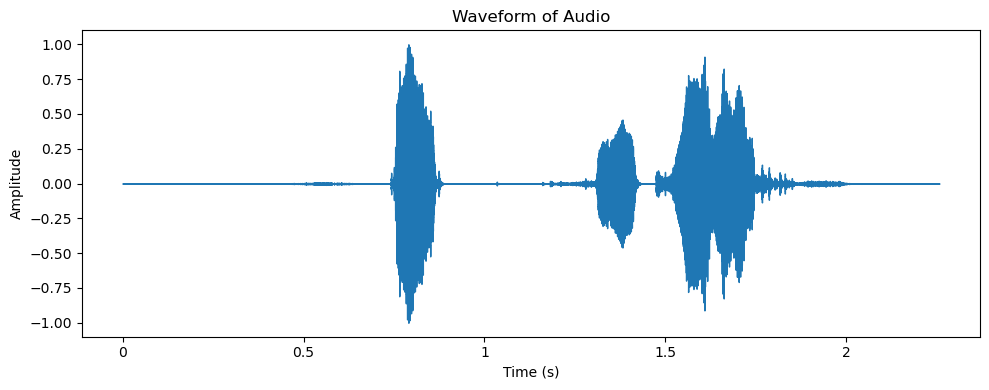

In [59]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio')
plt.tight_layout()
plt.show()

#### Spektogram (belom di log)

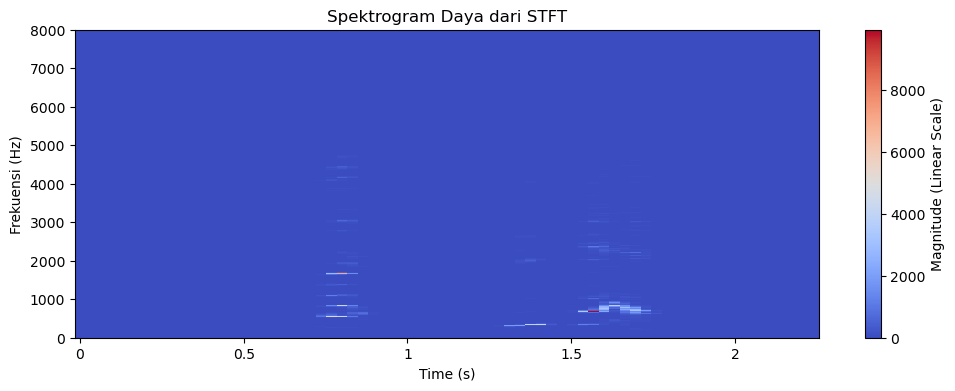

In [60]:
# Parameter STFT
n_fft = 2048  # Ukuran FFT
hop_length = 512  # Panjang hop antar window
win_length = 2048  # Panjang window

# Compute STFT
stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window='hann')

# Convert STFT to magnitude (spektrum daya)
stft_magnitude = np.abs(stft_result) ** 2  # Persamaan (2.3)


# Plot STFT Magnitude (Power Spectrogram)
plt.figure(figsize=(12, 4))
librosa.display.specshow(stft_magnitude, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.colorbar(label="Magnitude (Linear Scale)")
plt.title('Spektrogram Daya dari STFT')
plt.xlabel('Time (s)')
plt.ylabel('Frekuensi (Hz)')
plt.show()


#### mel filter bank

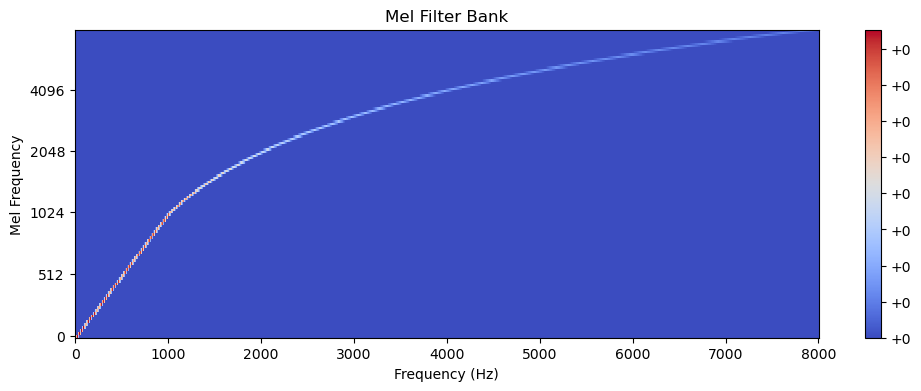

In [112]:
# Parameter untuk Mel filter bank
n_mels = 128  # Jumlah filter Mel

# Compute Mel filter bank
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

# Plot Mel Filter Bank
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_filter_bank, sr=sr, hop_length=hop_length, x_axis='linear', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f')
plt.title('Mel Filter Bank')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel Frequency')
plt.show()

#### melspektrogram (tanpa log)

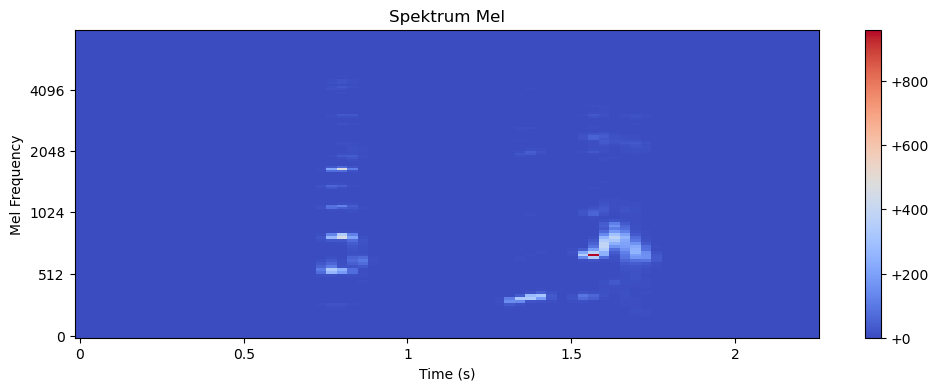

In [113]:
# Plot Spektrum Mel (Sebelum Transformasi Logaritmik)
# Apply Mel filter bank to STFT magnitude (Persamaan 2.5)
mel_spectrum = np.dot(mel_filter_bank, stft_magnitude)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spectrum, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f')
plt.title('Spektrum Mel')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

#### Mel spectrogram final (udah log)

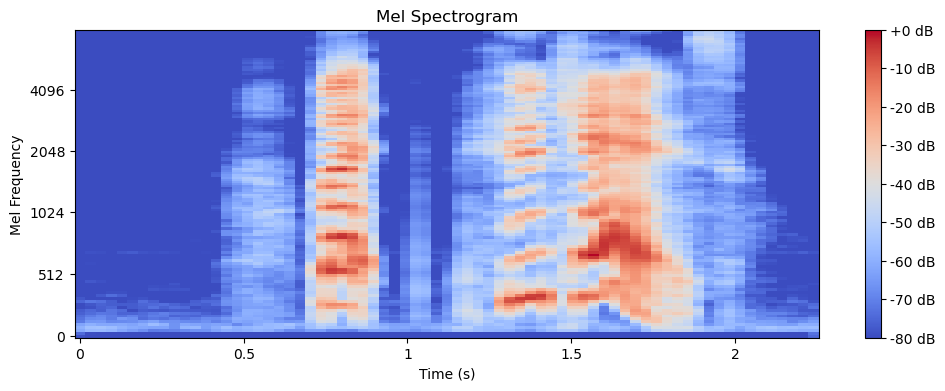

In [114]:
# Apply logarithmic transformation (Persamaan 2.6)
log_mel_spectrum = librosa.power_to_db(mel_spectrum, ref=np.max)
# Plot Log-Mel Spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_mel_spectrum, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()


In [115]:
# Konversi ke DataFrame
mel_df = pd.DataFrame(log_mel_spectrum,
                      index=[f"Mel-{i+1}" for i in range(n_mels)],
                      columns=[f"Frame-{j+1}" for j in range(log_mel_spectrum.shape[1])])
mel_df

,Frame-1,Frame-2,Frame-3,Frame-4,Frame-5,Frame-6,Frame-7,Frame-8,Frame-9,Frame-10,...,Frame-62,Frame-63,Frame-64,Frame-65,Frame-66,Frame-67,Frame-68,Frame-69,Frame-70,Frame-71
Mel-1,-78.446548,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-74.865646
Mel-2,-74.355362,-79.678734,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-73.006187
Mel-3,-61.396690,-57.634537,-57.235546,-58.684151,-62.051750,-64.516960,-67.162209,-70.984619,-70.351685,-69.755173,...,-57.476967,-61.716621,-64.589714,-60.394188,-57.544395,-57.170967,-58.366470,-59.342148,-60.596207,-60.930840
Mel-4,-59.394623,-55.345955,-54.754906,-56.533291,-59.268150,-61.034622,-62.124672,-62.800117,-62.765274,-66.532257,...,-55.130898,-57.083290,-62.201958,-58.564766,-54.807243,-53.801170,-56.434387,-55.886677,-57.135681,-56.424370
Mel-5,-62.702438,-59.953945,-61.573154,-61.892342,-61.463367,-62.776123,-60.382488,-56.384449,-59.177292,-66.553368,...,-60.768494,-57.439911,-57.631493,-59.178528,-61.566040,-62.324135,-63.598518,-63.802368,-59.874512,-60.616669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mel-124,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-49.148716,-57.309479,-72.649826,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
Mel-125,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-51.340916,-56.210472,-68.787933,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
Mel-126,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-50.690849,-56.236179,-68.745071,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
Mel-127,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-52.425232,-57.919037,-71.480133,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000


### Visualisasi Input CNN-LSTM

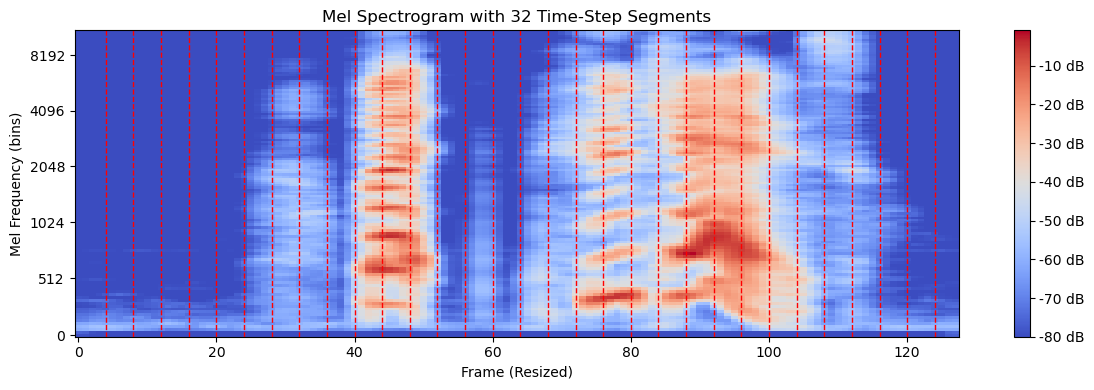

In [116]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

#REAL
data_real = example_path["filepath"].iloc[0]
y, sr = librosa.load(data_real, sr=16000, mono=True)
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)
mel_resized = resize(mel_db, (128, 128), mode='reflect', anti_aliasing=True)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_resized, x_axis='frames', y_axis='mel', cmap='coolwarm')

for i in range(1, 32):
    plt.axvline(x=i * 4, color='red', linestyle='--', linewidth=1)

plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram with 32 Time-Step Segments')
plt.xlabel('Frame (Resized)')
plt.ylabel('Mel Frequency (bins)')
plt.tight_layout()
plt.show()



### Contoh Spoofed

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os  # tambahan

def plot_mel_spectrogram(audio_path, sr=None, n_mels=128, fmax=None, hop_length=512):
    """
    Menampilkan visualisasi Mel-spectrogram dari file audio dengan judul nama file.

    Parameters:
    - audio_path : str
        Path ke file audio (misal: 'audio.wav')
    - sr : int or None
        Sample rate target. Jika None, gunakan sample rate asli.
    - n_mels : int
        Jumlah Mel bands.
    - fmax : int or None
        Frekuensi maksimum dalam Hz.
    - hop_length : int
        Ukuran langkah per frame (default = 512)
    """
    y, sr = librosa.load(audio_path, sr=sr)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                               fmax=fmax, hop_length=hop_length)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    file_name = os.path.basename(audio_path)  # ambil nama file saja

    plt.figure(figsize=(5, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length,
                              x_axis='time', y_axis='mel', fmax=fmax, cmap='coolwarm')
    plt.title(f'{file_name}')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()



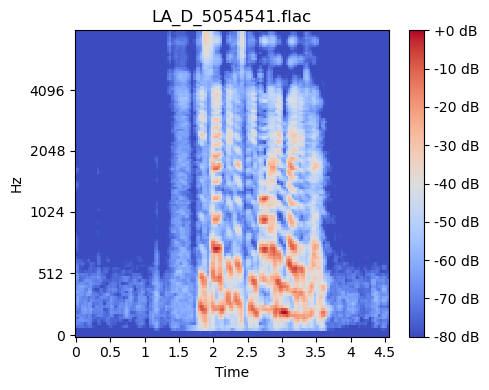

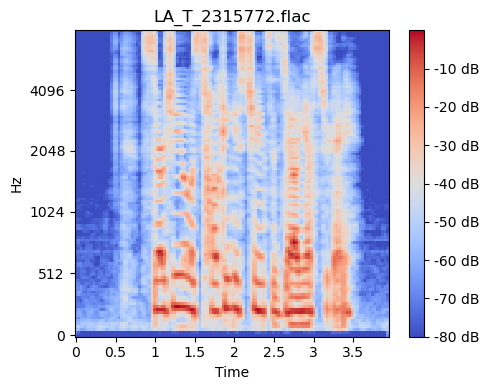

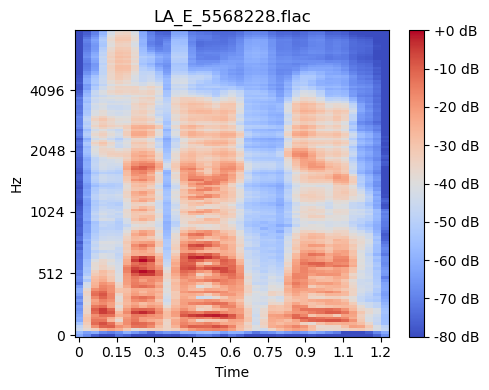

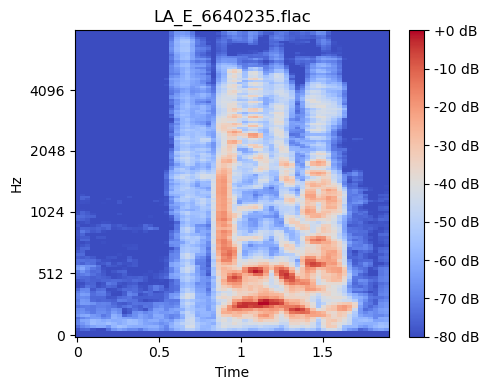

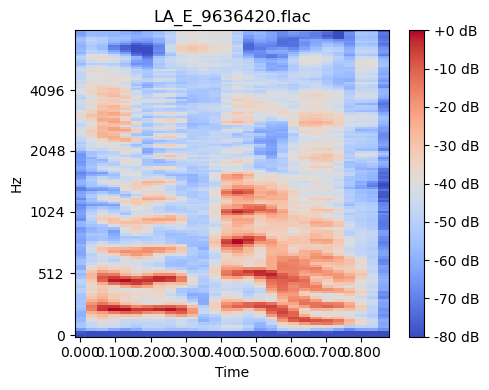

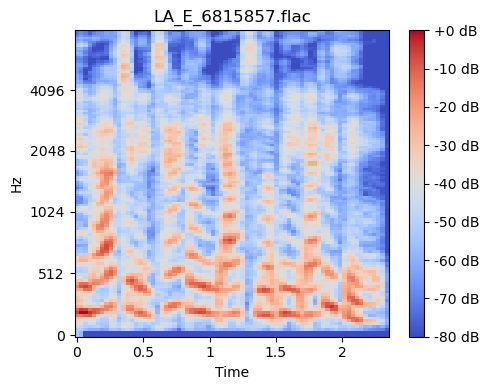

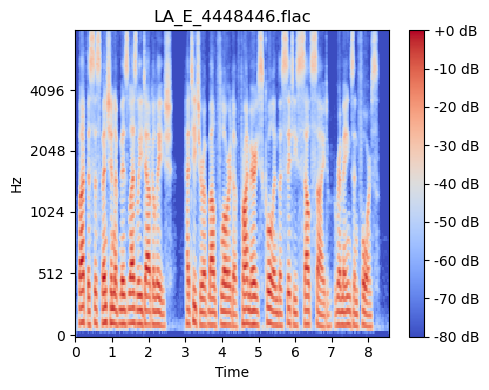

In [83]:
df_1 = df[df["target"]==1].sample(1000)
path_1 = df_1.iloc[:7,4]
for path in path_1:
    plot_mel_spectrogram(path)

### Contoh Bonafide

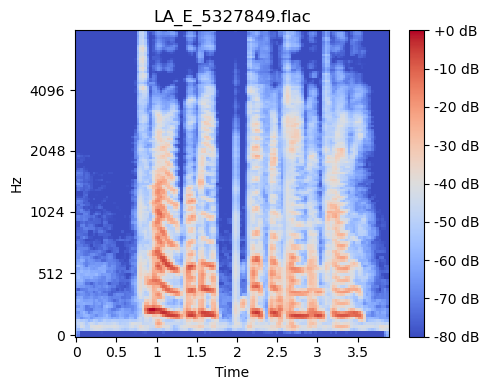

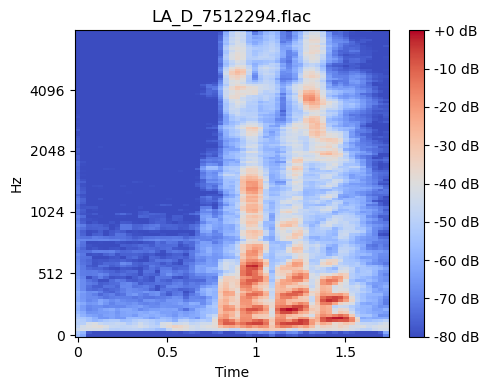

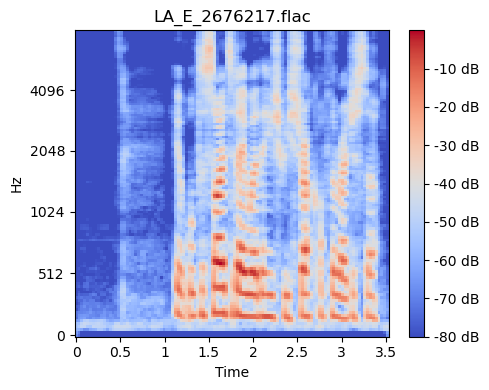

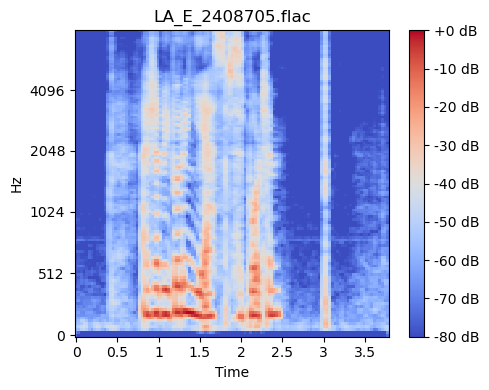

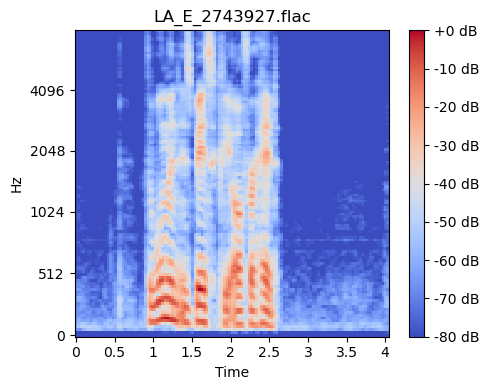

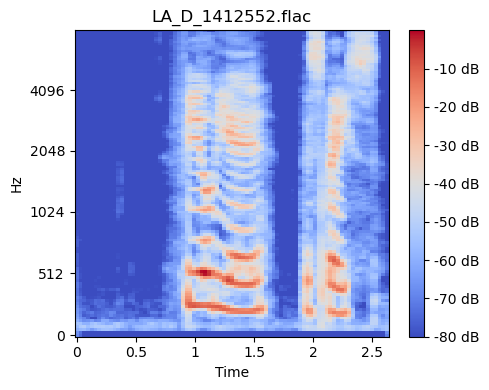

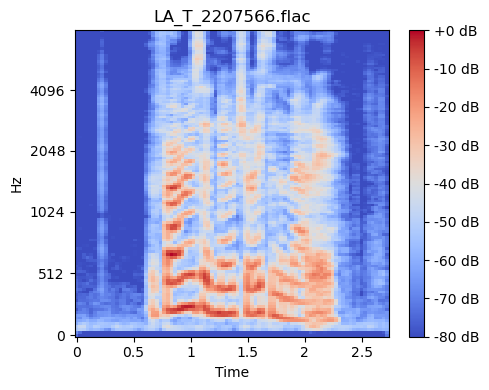

In [84]:
df_0 = df[df["target"]==0].sample(1000)
path_0 = df_0.iloc[:7,4]
for path in path_0:
    plot_mel_spectrogram(path)